# Predicting bike rentals:
Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

[Hadi Fanaee-T](http://www.liaad.up.pt/area/fanaee) at the University of Porto compiled this data into a CSV file, which you'll be working with in this project. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. Data can be downloaded from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

## About:
We will predict the bike rentals by creating and training different machine learning models and analyse their performance.
Here is the description of the csv columns:

Column name|Description
------|----------
instant | A unique sequential ID number for each row
dteday | The date of the rentals
season | The season in which the rentals occurred
yr | The year the rentals occurred
mnth | The month the rentals occurred
hr | The hour the rentals occurred
holiday | Whether or not the day was a holiday
weekday | The day of the week (as a number, 0 to 7)
workingday | Whether or not the day was a working day
weathersit | The weather (as a categorical variable)
temp | The temperature, on a 0-1 scale
atemp | The adjusted temperature
hum | The humidity, on a 0-1 scale
windspeed | The wind speed, on a 0-1 scale
casual | The number of casual riders (people who hadn't previously signed up with the bike sharing program)
registered | The number of registered riders (people who had already signed up)
cnt | The total number of bike rentals (casual + registered)


In [2]:
import pandas as pd
bike_rentals = pd.read_csv("bike_rental_hour.csv")

In [3]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike_rentals.shape

(17379, 17)

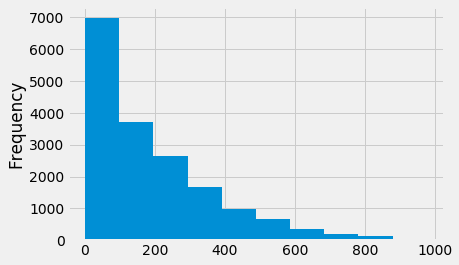

In [6]:
#plotting distribution of cnt values
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
bike_rentals["cnt"].plot.hist()

In [13]:
#correlation between "cnt" and other variables
bike_rentals.corr()["cnt"].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

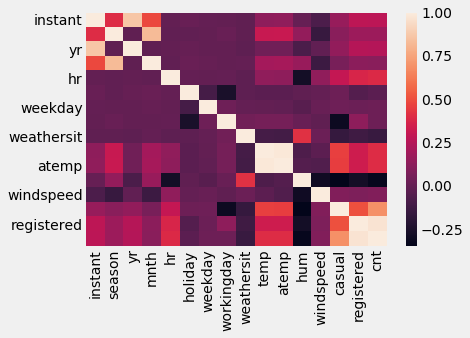

In [14]:
#plotting relation between all variables
import seaborn as sns
sns.heatmap(bike_rentals.corr())

In [15]:
#adding time label for hour 
def add_time_label(hour):
    if hour>=0 and hour<6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3
    
bike_rentals["time_label"] = bike_rentals["hr"].apply(add_time_label)

In [16]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


## Picking error metric:
We can see that `cnt` has continuous values so its better to pick a error metric which is useful for calculation on *continuous variable*. So we will be using `Mean squared error` metric as our error calculation metric.

In [123]:
import random
bike_rentals = bike_rentals.loc[np.random.permutation(bike_rentals.index),:]
per_80 = int((len(bike_rentals))*0.8)
train = bike_rentals[:per_80]
test = bike_rentals[per_80:]
#test2 = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
#we could have picked test data like avove as well

## Creating models:
Here we won't be using `casual` and `registered` columns, as our *target column* is derived from these columns.Also we won't be using `dteday` column as date value doesn't have any relation with our *target_column*.

In [124]:
train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_label'],
      dtype='object')

In [125]:
features = ['instant',  'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']

### Linear Regression:

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression()
linear_model.fit(train[features],train["cnt"])
predictions_test = linear_model.predict(test[features])
error_test = mean_squared_error(test["cnt"],predictions_test)
print("Mean squared error for test data is {}".format(error_test))

Mean squared error for test data is 18104.90111166983


In [127]:
predictions_train = linear_model.predict(train[features])
error_train = mean_squared_error(predictions_train,train["cnt"])
print("Mean squared error for test data is {}".format(error_train))

Mean squared error for test data is 17321.059242449028


#### Error:
We can see the error is very high. So this model doesn't suggest a good prediction.We need to move to another regression model with better prediction ability. Linear regression works best when predictors are linearly correlated to the target and also independent -- in other words, they don't change meaning when we combine them with each other. The good thing about linear regression is that it's fairly resistant to overfitting because it's straightforward. It also can be prone to underfitting the data, however, and not building a powerful enough model. This means that linear regression usually isn't the most accurate option.

Let's use decision tree.

### Decision Tree:

In [128]:
from sklearn.tree import DecisionTreeRegressor
decision_model = DecisionTreeRegressor(min_samples_leaf=5,max_depth=50)
decision_model.fit(train[features],train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [129]:
predictions_test = decision_model.predict(test[features])
error_test = mean_squared_error(test["cnt"],predictions_test)
print("Mean squared error for test data is {}".format(error_test))

Mean squared error for test data is 2390.257221994669


#### Error:
Error is reduced as we used non linear model. Mean sqaured error value is fairly low in Decision Tree as compared to Linear Regression model. Decision trees tend to predict outcomes much more reliably than linear regression models. Because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

Let's use emsembling by using Random Forest model.

### Random Forest:

In [130]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor(min_samples_leaf=5)
random_model.fit(train[features],train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [131]:
predictions_test = random_model.predict(test[features])

In [134]:
error_test = mean_squared_error(test["cnt"],predictions_test)
print("Mean squared error for test data is {}".format(error_test))

Mean squared error for test data is 1912.5261336317787


#### Error:
So we have failry reduced the error metric by using Random Forest Regressor.

## Conclusion:
Above we analysed our dataset and since our target value is a continuous variable, so we used three `regressor models` and found that RandomForestRegressor model gave us least error for above feature and target relationship.